<a href="https://colab.research.google.com/github/nicecarrot/AI-Study/blob/main/wordcloud_chatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install konlpy

In [2]:
# *- encoding: utf-8 -*- 패키지 불러오는 작업 
import json 
import ast
import sys
import re #정규 표현식 가지고 오는 패키지 
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma

In [3]:
#파일 가져오는문 
from google.colab import files
myfile = files.upload()

In [4]:
#대화 파일 열기 강아지 - > 파일 이름명

openFileName = '판소.txt'
f = open(openFileName, 'r', encoding='UTF-8') 
data = f.read()
f.close()

In [6]:
data

# 토큰화 : 쪼개는거 
# 태깅 : 명사 , 동사 구분해주는 것  ( 명사,동사 or 명사 형용사)
# 빈도 
# 어린왕자 : 8 , 떡 : 10 , 
# 글씨크기가 달라지고 - > 워드 클라우드 


'2.1. 1세대, PC통신 연재에서 출판으로[편집]\n대한민국의 창작 판타지 팬덤은 90년대의 VT 통신망을 중심으로 형성되었다.\n\n팬덤의 형성 과정은 크게 두 시기로 가를 수 있다. 90년대 중반 초창기의 상업적 형성 과정과 2000년대 이후 한국의 자생적인 무협소설과 MMORPG에 영향을 많이 받은 시기다.\n\n90년대 중반의 초창기 한국 판타지 팬덤의 탄생 배경에는 《던전 앤 드래곤 시리즈》나 《소드 월드 RPG》 같은 TRPG 문화, 《슬레이어즈》, 《로도스도 전기》, 《은하영웅전설》 같은 일본의 초기 라이트 노벨 계열, 《울티마 시리즈》, 《위저드리》, 〈드래곤 퀘스트〉 같은 게임을 통한 판타지 문화의 수용, 1994년 용대운의 《태극문》을 시작으로 일어났던 일련의 신무협 열풍[3], 《반지의 제왕》, 《드래곤랜스》 등 영미 문학의 제한적인 영향이 섞여 있다.\n\nTRPG는 당시 청소년들이 즐겨보던 게임 잡지(예: 〈게임 매거진〉)를 통하여 소개되었으며, PC통신을 통해 취미생활로 즐기는 사람들이 생겨났다. 일본, 영미의 판타지 소설은 번역을 통해 소수나마 출판되었으며, 〈슬레이어즈〉 등의 애니메이션은 TV에서 방영되기도 했다. 또한 비디오 게임과 PC 게임을 통해 판타지 세계관을 접하기도 했다.\n\n이것은 초창기에 나왔던 홍정훈, 이경영 등의 판타지 소설들을 읽어 보면 현저하게 느껴진다. 이 시기의 한국 판타지는 독창적이라기 보다는 주로 외국의 판타지 작품을 모방한 습작’이며, 일종의 ‘팬픽션’과도 같았다. 실력있는 작가들은 이미 어느정도 자신만의 개성을 지니고 있었다고 볼 수도 있으나, 대부분은 그저 모방과 습작에 그치고 말았다. 때문에 TRPG의 룰북이나 JRPG의 설정을 차용하는 일들이 매우 빈번했는데, 사실 당시로서는 큰 문제라고 보기 어려웠다. 해외 저작물의 저작권이 국내에서 인정된 것이 90년대 중반부터였고, 2000년대 초반까지만 해도 저작권 자체가 일반인들에게 보편적인 개념이 아니었다. 그러다가 2000년대 중반부터 문제가 

In [5]:
from konlpy.tag import Okt
okt=Okt()
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [6]:
#tokenizer-> 쪼갤거에요 word 토큰화 
#pos tagging 다양하게 -> okt, kkma, mecab 다양하게 있었어요 , -> okt 트위터 할꺼에요 
#pos tagging -> pos (품사), tagging(붙여주는 )
#stop word -> 

ff=open('판소_명사형용사추출.txt','w')

from konlpy.tag import Okt
okt=Okt()
documents1=[]

    # pos 에  verb, noun 넣으면 같이 뽑혀서나와요
    #"푸들","토이푸들" 
def tokenizer(raw, pos=["Noun","Adjective"], stopword=["한국","판타지","있다"]):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

documents1=tokenizer(data)
print(documents1)    

for b in range(0,len(documents1)):
    fb=documents1[b]
    ff.write('%s \n'%fb)

ff.close()

['세대', '통신', '연재', '출판', '편집', '대한민국', '창작', '팬덤', '통신망', '중심', '형성', '팬덤', '형성', '과정', '크게', '시기', '중반', '초창', '상업', '형성', '과정', '이후', '자생', '무협소설', '영향', '시기', '중반', '초창', '팬덤', '탄생', '배경', '던전', '드래곤', '시리즈', '소드', '월드', '같다', '문화', '슬레이어즈', '로도스', '전기', '은하', '영웅전설', '같다', '일본', '초기', '라이트', '노벨', '계열', '울티마', '시리즈', '위저드', '드래곤', '퀘스트', '같다', '게임', '통한', '문화', '수용', '대운', '태극문', '시작', '일련', '신무협', '열풍', '반지', '제왕', '드래곤랜스', '영미', '문학', '제한', '영향', '당시', '청소년', '게임', '잡지', '게임', '소개', '통신', '통해', '취미', '생활', '사람', '일본', '영미', '소설', '번역', '통해', '소수', '출판', '슬레이어즈', '애니메이션', '방영', '기도', '또한', '비디오', '게임', '게임', '통해', '세계관', '초창', '홍정훈', '이경영', '소설', '현저', '시기', '독창', '주로', '외국', '작품', '모방', '습작', '일종', '팬픽션', '과도', '같다', '실력', '작가', '정도', '자신', '개성', '지니', '수도', '대부분', '모방', '습작', '때문', '룰북', '설정', '차용', '매우', '빈번', '사실', '로서', '문제', '보기', '어렵다', '해외', '저작물', '저작권', '국내', '인정', '중반', '초반', '해도', '저작권', '자체', '일반인', '보편', '개념', '아니다', '중반', '문제', '제시', '이후', '세대', '소설', '개정판', '아예', '

In [7]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
openFileName = '판소_명사형용사추출.txt'
    
f = open(openFileName, 'r')
data = f.read()
f.close()

In [10]:
data = [data]
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [13]:
data

['세대 \n통신 \n연재 \n출판 \n편집 \n대한민국 \n창작 \n팬덤 \n통신망 \n중심 \n형성 \n팬덤 \n형성 \n과정 \n크게 \n시기 \n있다 \n중반 \n초창 \n상업 \n형성 \n과정 \n이후 \n자생 \n무협소설 \n영향 \n시기 \n중반 \n초창 \n팬덤 \n탄생 \n배경 \n던전 \n드래곤 \n시리즈 \n소드 \n월드 \n같다 \n문화 \n슬레이어즈 \n로도스 \n전기 \n은하 \n영웅전설 \n같다 \n일본 \n초기 \n라이트 \n노벨 \n계열 \n울티마 \n시리즈 \n위저드 \n드래곤 \n퀘스트 \n같다 \n게임 \n통한 \n문화 \n수용 \n대운 \n태극문 \n시작 \n일련 \n신무협 \n열풍 \n반지 \n제왕 \n드래곤랜스 \n영미 \n문학 \n제한 \n영향 \n있다 \n당시 \n청소년 \n게임 \n잡지 \n게임 \n소개 \n통신 \n통해 \n취미 \n생활 \n사람 \n일본 \n영미 \n소설 \n번역 \n통해 \n소수 \n출판 \n슬레이어즈 \n애니메이션 \n방영 \n기도 \n또한 \n비디오 \n게임 \n게임 \n통해 \n세계관 \n초창 \n홍정훈 \n이경영 \n소설 \n현저 \n시기 \n독창 \n주로 \n외국 \n작품 \n모방 \n습작 \n일종 \n팬픽션 \n과도 \n같다 \n실력 \n있다 \n작가 \n정도 \n자신 \n개성 \n지니 \n있다 \n수도 \n있다 \n대부분 \n모방 \n습작 \n때문 \n룰북 \n설정 \n차용 \n매우 \n빈번 \n사실 \n로서 \n문제 \n보기 \n어렵다 \n해외 \n저작물 \n저작권 \n국내 \n인정 \n중반 \n초반 \n해도 \n저작권 \n자체 \n일반인 \n보편 \n개념 \n아니다 \n중반 \n문제 \n제시 \n이후 \n세대 \n소설 \n개정판 \n아예 \n설정 \n수정 \n경우 \n있다 \n한편 \n이러하다 \n맥락 \n당시 \n인기 \n드래곤 \n카르 \n세아 \n린등 \n차용 \n해외 \n세계관 \n모방 \n이후 \n소설 \n클리셰 \n막대 \n영향 \n서클 \n체계 \n오우거 \n오크 

In [11]:
print(vectorize.vocabulary_)

{'세대': 238, '통신': 502, '연재': 325, '출판': 480, '편집': 515, '대한민국': 97, '창작': 466, '팬덤': 512, '통신망': 503, '중심': 451, '형성': 537, '과정': 32, '크게': 493, '시기': 267, '중반': 450, '초창': 478, '상업': 216, '이후': 376, '자생': 392, '무협소설': 154, '영향': 331, '탄생': 497, '배경': 170, '던전': 100, '드래곤': 109, '시리즈': 269, '소드': 243, '월드': 352, '같다': 5, '문화': 158, '슬레이어즈': 265, '로도스': 122, '전기': 412, '은하': 363, '영웅전설': 330, '일본': 386, '초기': 475, '라이트': 120, '노벨': 66, '계열': 26, '울티마': 351, '위저드': 355, '퀘스트': 491, '게임': 17, '통한': 504, '수용': 255, '대운': 91, '태극문': 498, '시작': 271, '일련': 382, '신무협': 275, '열풍': 326, '반지': 167, '제왕': 435, '드래곤랜스': 110, '영미': 327, '문학': 157, '제한': 437, '당시': 83, '청소년': 471, '잡지': 400, '소개': 242, '통해': 505, '취미': 483, '생활': 223, '사람': 202, '소설': 248, '번역': 171, '소수': 249, '애니메이션': 295, '방영': 169, '기도': 50, '또한': 117, '비디오': 195, '세계관': 237, '홍정훈': 541, '이경영': 366, '현저': 536, '독창': 107, '주로': 442, '외국': 345, '작품': 398, '모방': 146, '습작': 266, '일종': 390, '팬픽션': 514, '과도': 31, '실력': 278, '작가': 397, 

In [15]:
print(X.toarray())

[[ 3  1  1  2  1 12  2  1  1  1  1  1  2  1  1  1  1  7  1  1  2  1  4  2
   1  1  1  1  2  1  1  1  2  1  1  1  1  2  3  1  1  1  1  1  2  2  2  1
   1  2  1  1  1  1  1  3  1  2  1  1  2  1  1  3  1  1  2  1  2  1  1  1
   2  2  1  1  1  1  3  1  1  1  1  2  1  2  1  1  5  2  9  1  1  1  1  4
   1  1  1  1  1  1  1  2  1  2 10  1  2  8  1  1  1  4  1  1  7  4  2  1
   2  2  1  1  5  1  1  1  1  1  1  1  1  1  4  1  5  1  1  1  1  2  1  1
   1  1  3  2  2  2  1  1  1 14  2  4  2  2  3  2  1  1  1  1  1  1  1  2
   3  1  2  1  1  4  1  1  3  2  1  1  1  1  2  1  1  1  1  1  1  1  1  2
   1  1  1  1  2  3  1  1  1  1  2  1  1  1  2  1  1  1  7  1  1  1  1  1
   3  2  1  1  1  3  3  1  1  1  1  1  1  1  4  1  1  1  1  1  1  2 10  1
   1  1  1  1  1  1  1  1 42  3  1  1  2  1  1  1  1  1  1  2  1  3  1  1
   1  2  3  4  6  2  2 12  9  3  1  3  1  1  1  2  1  1  1  1  2  5  1  1
   1  1  1  1  1  1  2  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  1  1
   2  1  1  7  1  3  1  2  1  1  1  3 

In [18]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0.03770975 0.01256992 0.01256992 0.02513984 0.01256992 0.15083902
  0.02513984 0.01256992 0.01256992 0.01256992 0.01256992 0.01256992
  0.02513984 0.01256992 0.01256992 0.01256992 0.01256992 0.08798943
  0.01256992 0.01256992 0.02513984 0.01256992 0.05027967 0.02513984
  0.01256992 0.01256992 0.01256992 0.01256992 0.02513984 0.01256992
  0.01256992 0.01256992 0.02513984 0.01256992 0.01256992 0.01256992
  0.01256992 0.02513984 0.03770975 0.01256992 0.01256992 0.01256992
  0.01256992 0.01256992 0.02513984 0.02513984 0.02513984 0.01256992
  0.01256992 0.02513984 0.01256992 0.01256992 0.01256992 0.01256992
  0.01256992 0.03770975 0.01256992 0.02513984 0.01256992 0.01256992
  0.02513984 0.01256992 0.01256992 0.03770975 0.01256992 0.01256992
  0.02513984 0.01256992 0.02513984 0.01256992 0.01256992 0.01256992
  0.02513984 0.02513984 0.01256992 0.01256992 0.01256992 0.01256992
  0.03770975 0.01256992 0.01256992 0.01256992 0.01256992 0.02513984
  0.01256992 0.02513984 0.01256992 0.01256992 0.

In [15]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'가격': 3,
 '가능하다': 1,
 '가이드라인': 1,
 '가장': 2,
 '감정': 1,
 '같다': 12,
 '개념': 2,
 '개선': 1,
 '개성': 1,
 '개인': 1,
 '개정판': 1,
 '개최': 1,
 '거나': 2,
 '거부': 1,
 '거의': 1,
 '거지': 1,
 '거품': 1,
 '게임': 7,
 '겜판': 1,
 '결과': 1,
 '결제': 2,
 '경배': 1,
 '경우': 4,
 '경제': 2,
 '계기': 1,
 '계약': 1,
 '계열': 1,
 '고착': 1,
 '공간': 2,
 '공급': 1,
 '과거': 1,
 '과도': 1,
 '과정': 2,
 '관심': 1,
 '광고': 1,
 '괜찮다': 1,
 '굉장하다': 1,
 '교정': 2,
 '구분': 3,
 '구성요소': 1,
 '구축': 1,
 '국내': 1,
 '굳이': 1,
 '규모': 1,
 '그것': 2,
 '그냥': 2,
 '그대로': 2,
 '급부': 1,
 '기간': 1,
 '기기': 2,
 '기도': 1,
 '기반': 1,
 '기업': 1,
 '기와': 1,
 '기점': 1,
 '기존': 3,
 '김근우': 1,
 '나머지': 2,
 '나물': 1,
 '난무': 1,
 '남성향': 2,
 '낮다': 1,
 '내면': 1,
 '내용': 3,
 '널리': 1,
 '네이버': 1,
 '노벨': 2,
 '노블': 1,
 '논쟁': 2,
 '높다': 1,
 '눈물': 1,
 '능가': 1,
 '다른': 2,
 '다만': 2,
 '다변': 1,
 '다시': 1,
 '다음': 1,
 '단계': 1,
 '단순하다': 3,
 '단어': 1,
 '달걀': 1,
 '답습': 1,
 '당당하다': 1,
 '당시': 2,
 '당연하다': 1,
 '대량': 2,
 '대립': 1,
 '대본소': 1,
 '대부분': 5,
 '대상': 2,
 '대여': 9,
 '대운': 1,
 '대중': 1,
 '대중화': 1,
 '대체': 1,
 '대표': 4,
 '대한': 1,
 '대한

In [14]:
from google.colab import files
myfile = files.upload()

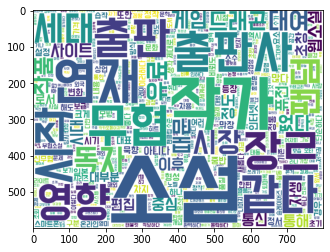

In [16]:
from wordcloud import WordCloud

w=WordCloud(font_path='BMDOHYEON_ttf.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [25]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) 
print(Y.toarray()) 

{'세대': 238, '통신': 502, '연재': 325, '출판': 480, '편집': 515, '대한민국': 97, '창작': 466, '팬덤': 512, '통신망': 503, '중심': 451, '형성': 537, '과정': 32, '크게': 493, '시기': 267, '중반': 450, '초창': 478, '상업': 216, '이후': 376, '자생': 392, '무협소설': 154, '영향': 331, '탄생': 497, '배경': 170, '던전': 100, '드래곤': 109, '시리즈': 269, '소드': 243, '월드': 352, '같다': 5, '문화': 158, '슬레이어즈': 265, '로도스': 122, '전기': 412, '은하': 363, '영웅전설': 330, '일본': 386, '초기': 475, '라이트': 120, '노벨': 66, '계열': 26, '울티마': 351, '위저드': 355, '퀘스트': 491, '게임': 17, '통한': 504, '수용': 255, '대운': 91, '태극문': 498, '시작': 271, '일련': 382, '신무협': 275, '열풍': 326, '반지': 167, '제왕': 435, '드래곤랜스': 110, '영미': 327, '문학': 157, '제한': 437, '당시': 83, '청소년': 471, '잡지': 400, '소개': 242, '통해': 505, '취미': 483, '생활': 223, '사람': 202, '소설': 248, '번역': 171, '소수': 249, '애니메이션': 295, '방영': 169, '기도': 50, '또한': 117, '비디오': 195, '세계관': 237, '홍정훈': 541, '이경영': 366, '현저': 536, '독창': 107, '주로': 442, '외국': 345, '작품': 398, '모방': 146, '습작': 266, '일종': 390, '팬픽션': 514, '과도': 31, '실력': 278, '작가': 397, 

In [26]:
freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict(freqs_TFIDF)

{'가격': 0.0377097546592488,
 '가능하다': 0.0125699182197496,
 '가이드라인': 0.0125699182197496,
 '가장': 0.0251398364394992,
 '감정': 0.0125699182197496,
 '같다': 0.1508390186369952,
 '개념': 0.0251398364394992,
 '개선': 0.0125699182197496,
 '개성': 0.0125699182197496,
 '개인': 0.0125699182197496,
 '개정판': 0.0125699182197496,
 '개최': 0.0125699182197496,
 '거나': 0.0251398364394992,
 '거부': 0.0125699182197496,
 '거의': 0.0125699182197496,
 '거지': 0.0125699182197496,
 '거품': 0.0125699182197496,
 '게임': 0.08798942753824719,
 '겜판': 0.0125699182197496,
 '결과': 0.0125699182197496,
 '결제': 0.0251398364394992,
 '경배': 0.0125699182197496,
 '경우': 0.0502796728789984,
 '경제': 0.0251398364394992,
 '계기': 0.0125699182197496,
 '계약': 0.0125699182197496,
 '계열': 0.0125699182197496,
 '고착': 0.0125699182197496,
 '공간': 0.0251398364394992,
 '공급': 0.0125699182197496,
 '과거': 0.0125699182197496,
 '과도': 0.0125699182197496,
 '과정': 0.0251398364394992,
 '관심': 0.0125699182197496,
 '광고': 0.0125699182197496,
 '괜찮다': 0.0125699182197496,
 '굉장하다': 0.012569918

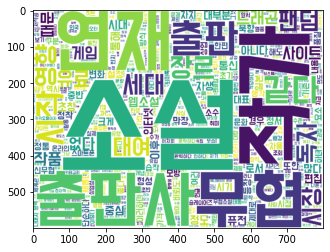

In [27]:
w1=WordCloud(font_path = 'BMDOHYEON_ttf.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

In [21]:
from google.colab import files
myfile = files.upload()

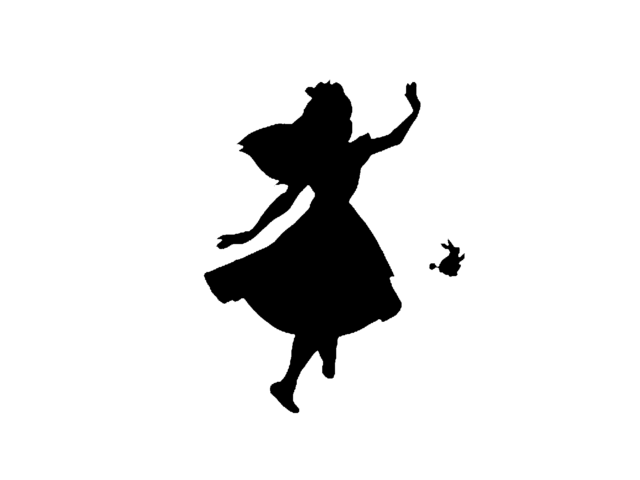

In [28]:
from collections import Counter  # Count the frequency of distinct strings
from wordcloud import WordCloud, ImageColorGenerator  # Generate wordclouds
from PIL import Image  # Load images from files
import numpy as np  # Convert images to numbers

image = Image.open("alice.png")  # Load the image from a file

image  # Display the image

In [23]:
mask = np.array(image)  # Convert the image to a numeric representation (a 3D array)
mask[0][0]  # Display the top left pixel of the mask, which is white

array([255, 255, 255, 255], dtype=uint8)

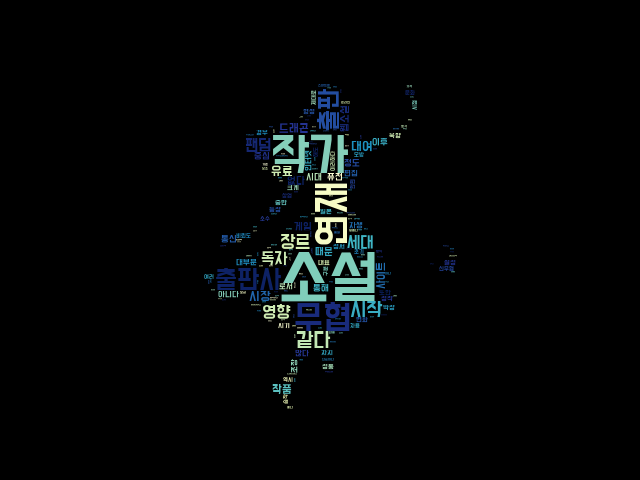

In [32]:
# Create a wordcloud generator with a mask

fog_machine = WordCloud(font_path = 'BMDOHYEON_ttf.ttf',
                        mask=mask,
                        min_font_size=2,
                        colormap="YlGnBu_r")  

# Generate the cloud using a frequency dictionary

fog_machine.fit_words(dict(freqs_TFIDF))

fog_machine.to_image()  # Display the cloud

In [33]:
from konlpy.tag import Okt  
okt=Okt()  #twitter
print(okt.morphs("나는 오늘도 공부를 하고 있네요?"))

['나', '는', '오늘', '도', '공부', '를', '하고', '있네요', '?']


In [34]:
print(okt.pos("나는 인공지능 수업을 듣고있고, 9시에는 수업이 끝날껄? 아마"))  

[('나', 'Noun'), ('는', 'Josa'), ('인공', 'Noun'), ('지능', 'Noun'), ('수업', 'Noun'), ('을', 'Josa'), ('듣고있고', 'Verb'), (',', 'Punctuation'), ('9시', 'Number'), ('에는', 'Foreign'), ('수업', 'Noun'), ('이', 'Josa'), ('끝날껄', 'Noun'), ('?', 'Punctuation'), ('아마', 'Noun')]


In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [35]:
text =" 안녕하세요 오늘은 날씨가 좋네요ㅇㅁㅇㅁㅋㅋㅋㅋㅋ"

In [36]:
okt.morphs(text)

['안녕하세요', '오늘', '은', '날씨', '가', '좋네요', 'ㅇㅁㅇㅁㅋㅋㅋㅋㅋ']

In [37]:
okt.morphs(text,stem=True)

['안녕하다', '오늘', '은', '날씨', '가', '좋다', 'ㅇㅁㅇㅁㅋㅋㅋㅋㅋ']

In [38]:
okt.morphs(text,norm=True)

['안녕하세요', '오늘', '은', '날씨', '가', '좋네요', 'ㅇㅁㅇㅁㅋㅋㅋ']